In [10]:
from Pic16aProject import star_data
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn as sklearn

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
  
   

In [3]:
exoTrain = star_data(datafile = "exoTrain.csv")

In [4]:
exoTrain.fit_tree()

DecisionTreeClassifier(max_depth=2)

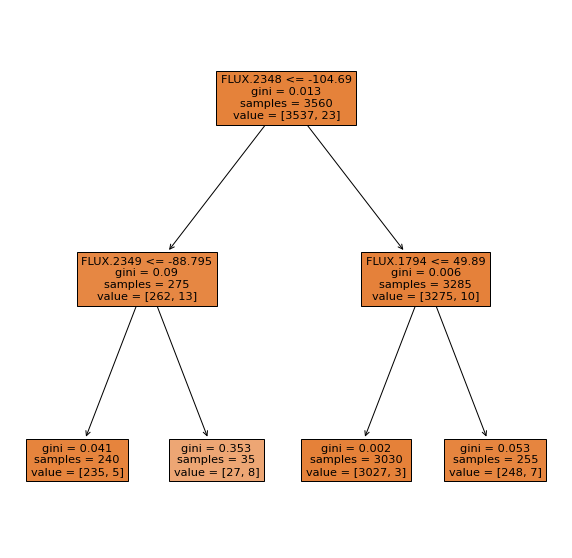

In [5]:
exoTrain.plot_tree()

In [6]:
exoTrain.all_tree_scores()

Train score for tree model: 0.9935393258426967
Fake Test score for tree model: 0.9908316961362148


In [7]:
exoTrain.fit_knn()

KNeighborsClassifier(n_neighbors=2)

In [8]:
exoTrain.all_knn_scores()

Train score for KNN model: 0.9935393258426967
Test score for KNN model: 0.9927963326784545


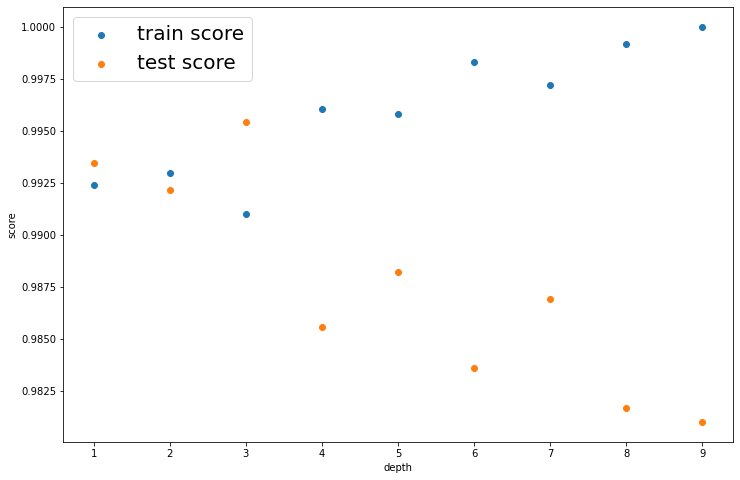

In [16]:
# function outside class

def plot_tree_scores(depths = np.arange(1, 10)):
    #makes empty plot
    fig, ax = plt.subplots(1, figsize= (12, 8))
    train_scores = []
    test_scores = []
    
    #checks accuracy score for each depth in inputted range
    for d in depths:
        exoTrain = star_data(datafile = "exoTrain.csv", d = d)
        exoTrain.fit_tree()
        train_score = exoTrain.tree_train_score()
        test_score = exoTrain.tree_test_score()
        train_scores.append(train_score)
        test_scores.append(test_score)  
    
    #plots each score
    ax.scatter(depths, train_scores, label='train score')
    ax.scatter(depths, test_scores, label='test score')
    ax.set(xlabel="depth", ylabel= 'score')
    plt.legend(fontsize=20)
    plt.show()
    
    
plot_tree_scores()

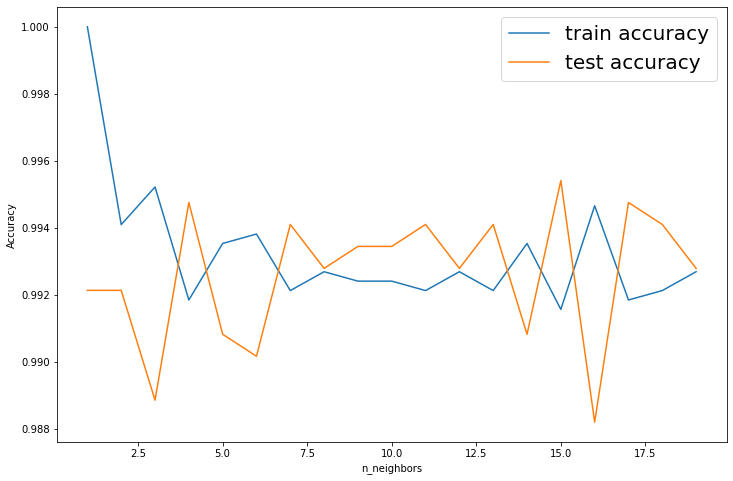

In [12]:
# function outside class

def plot_knn_scores(n_neighbors = np.arange(1, 20)):
    fig, ax = plt.subplots(1, figsize= (12, 8))
    n_neighbors = n_neighbors
    train_accuracy = []
    test_accuracy = []
    
    #checks accuracy score for each number of neighbors in inputted range
    for n in n_neighbors:
        exoTrain = star_data(datafile = "exoTrain.csv", n = n)
        exoTrain.fit_knn()
        knn = exoTrain.fit_knn()
        train_score = exoTrain.knn_train_score()
        test_score = exoTrain.knn_test_score()
        train_accuracy.append(train_score)
        test_accuracy.append(test_score)
    
    #plots each score
    ax.plot(n_neighbors, train_accuracy, label='train accuracy')
    ax.plot(n_neighbors, test_accuracy, label='test accuracy')
    ax.set(xlabel="n_neighbors", ylabel= 'Accuracy')
    plt.legend(fontsize=20)
    plt.show()    
    
plot_knn_scores()

In [21]:
#initializing d as the best depth for the decision tree and n as the best number of neighbors for KNN
exo_best = star_data(datafile = "exoTrain.csv",d = 3 , n = 15)

#reads test csv into pandas dataframe
exoTest = pd.read_csv('exoTest.csv')
#splits dataframe into predictor and outcome variables
X1 = exoTest.drop(['LABEL'], axis=1) # drop 'LABEL' column
y1 = exoTest['LABEL']


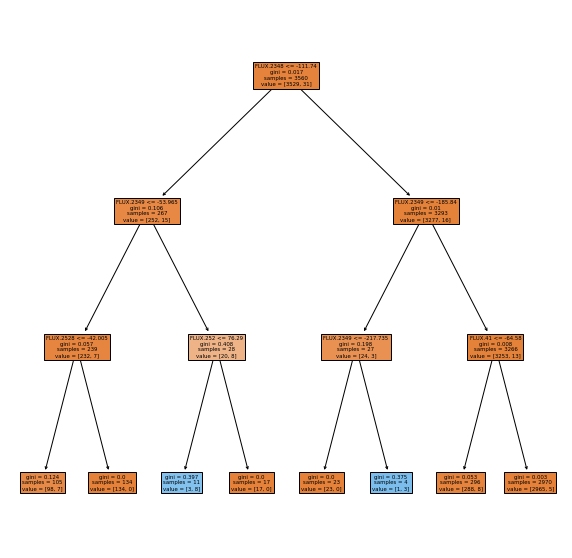

0.9859649122807017

In [19]:
#plotting the decision tree using the best depth
#finding the accuracy score of the bedecision tree against the test data
exo_best.plot_tree()
exo_best.model_tree.score(X1, y1)

In [23]:
#finding the accuracy score of the best number of neighbors for KNN against the test data

exo_best.fit_knn().score(X1, y1)



0.9912280701754386